#### Pyspark basics

In [39]:
raw_data = sc.textFile(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\daily_show.tsv")
raw_data.take(5)

['YEAR\tGoogleKnowlege_Occupation\tShow\tGroup\tRaw_Guest_List',
 '1999\tactor\t1/11/99\tActing\tMichael J. Fox',
 '1999\tComedian\t1/12/99\tComedy\tSandra Bernhard',
 '1999\ttelevision actress\t1/13/99\tActing\tTracey Ullman',
 '1999\tfilm actress\t1/14/99\tActing\tGillian Anderson']

In [40]:
daily_show = raw_data.map(lambda line: line.split('\t'))
daily_show.take(5)

[['YEAR', 'GoogleKnowlege_Occupation', 'Show', 'Group', 'Raw_Guest_List'],
 ['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson']]

In [45]:
# tally up the number of guests who have appeared on The Daily Show during each year
tally = daily_show.map(lambda x: (x[0], 1)).reduceByKey(lambda x,y: x+y)
print(tally) 
tally.take(tally.count())

PythonRDD[102] at RDD at PythonRDD.scala:53


[('YEAR', 1),
 ('2002', 159),
 ('2003', 166),
 ('2004', 164),
 ('2007', 141),
 ('2010', 165),
 ('2011', 163),
 ('2012', 164),
 ('2013', 166),
 ('2014', 163),
 ('2015', 100),
 ('1999', 166),
 ('2000', 169),
 ('2001', 157),
 ('2005', 162),
 ('2006', 161),
 ('2008', 164),
 ('2009', 163)]

In [47]:
def filter_year(line):
    if line[0] != "YEAR":
        return True

filtered_daily_show = daily_show.filter(lambda line: filter_year(line))
filtered_daily_show.take(5)

[['1999', 'actor', '1/11/99', 'Acting', 'Michael J. Fox'],
 ['1999', 'Comedian', '1/12/99', 'Comedy', 'Sandra Bernhard'],
 ['1999', 'television actress', '1/13/99', 'Acting', 'Tracey Ullman'],
 ['1999', 'film actress', '1/14/99', 'Acting', 'Gillian Anderson'],
 ['1999', 'actor', '1/18/99', 'Acting', 'David Alan Grier']]

#### Using pyspark in Jupyter

In [2]:
import findspark
findspark.init()

import pyspark
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

3.14160676


#### following cells won't run

In [3]:
sc = pyspark.SparkContext()
f = sc.textFile(r'C:\Users\Xueho\Projects\Python_projects\Raw_data\recent-grads.csv')
data = f.map(lambda line: line.split('\n'))

PythonRDD[2] at RDD at PythonRDD.scala:53

In [4]:
raw_hamlet = sc.textFile(r'C:\Users\Xueho\Projects\Python_projects\Raw_data\hamlet.txt')
split_hamlet = raw_hamlet.map(lambda line: line.split('\t'))

In [8]:
def hamlet_speaks(line):
    id = line[0]
    speaketh = False
    
    if "HAMLET" in line:
        speaketh = True
    
    if speaketh:
        yield id,"hamlet speaketh!"

hamlet_spoken = split_hamlet.flatMap(lambda x: hamlet_speaks(x))
print(hamlet_spoken)
hamlet_spoken.take(10)

PythonRDD[4] at RDD at PythonRDD.scala:53


[('hamlet@0', 'hamlet speaketh!'),
 ('hamlet@75', 'hamlet speaketh!'),
 ('hamlet@1004', 'hamlet speaketh!'),
 ('hamlet@9144', 'hamlet speaketh!'),
 ('hamlet@12313', 'hamlet speaketh!'),
 ('hamlet@12434', 'hamlet speaketh!'),
 ('hamlet@12760', 'hamlet speaketh!'),
 ('hamlet@12858', 'hamlet speaketh!'),
 ('hamlet@14821', 'hamlet speaketh!'),
 ('hamlet@15261', 'hamlet speaketh!')]

In [9]:
def filter_hamlet_speaks(line):
    if "HAMLET" in line:
        return True
    else:
        return False

hamlet_spoken_lines = split_hamlet.filter(lambda line: filter_hamlet_speaks(line))
hamlet_spoken_lines.take(5)

[['hamlet@0', '', 'HAMLET'],
 ['hamlet@75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['hamlet@1004', '', 'HAMLET'],
 ['hamlet@9144', '', 'HAMLET'],
 ['hamlet@12313',
  'HAMLET',
  '[Aside]  A little more than kin, and less than kind.']]

In [10]:
spoken_count = 0
spoken_101 = list()
spoken_count = hamlet_spoken_lines.count()
spoken_collect = hamlet_spoken_lines.collect()
spoken_101 = spoken_collect[100]

In [11]:
def format_id(x):
    id = x[0].split('@')[1]
    results = list()
    results.append(id)
    if len(x) > 1:
        for y in x[1:]:
            results.append(y)
    return results

hamlet_with_ids = split_hamlet.map(lambda line: format_id(line))
hamlet_with_ids.take(10)

[['0', '', 'HAMLET'],
 ['8'],
 ['9'],
 ['10', '', 'DRAMATIS PERSONAE'],
 ['29'],
 ['30'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['74'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['131']]

In [12]:
hamlet_with_ids.take(5)
real_text = hamlet_with_ids.filter(lambda line: len(line) > 1)
hamlet_text_only = real_text.map(lambda line: [l for l in line if l != ''])
hamlet_text_only.take(10)

[['0', 'HAMLET'],
 ['10', 'DRAMATIS PERSONAE'],
 ['31', 'CLAUDIUS', 'king of Denmark. (KING CLAUDIUS:)'],
 ['75', 'HAMLET', 'son to the late, and nephew to the present king.'],
 ['132', 'POLONIUS', 'lord chamberlain. (LORD POLONIUS:)'],
 ['177', 'HORATIO', 'friend to Hamlet.'],
 ['204', 'LAERTES', 'son to Polonius.'],
 ['230', 'LUCIANUS', 'nephew to the king.'],
 ['261', 'VOLTIMAND', '|'],
 ['273', '|']]

In [13]:
hamlet_text_only.take(10)
def fix_pipe(line):
    results = list()
    for l in line:
        if l == "|":
            pass
        elif "|" in l:
            fmtd = l.replace("|", "")
            results.append(fmtd)
        else:
            results.append(l)
    return results

clean_hamlet = hamlet_text_only.map(lambda line: fix_pipe(line))

#### spark dataframe

In [14]:
f = open(r'C:\Users\Xueho\Projects\Python_projects\Raw_data\census_2010.json')
for i in range(0,4):
    print(f.readline())

{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}

{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}

{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}

{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}



In [16]:
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [17]:
sqlCtx = SQLContext(sc)
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [18]:
df.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [19]:
first_five = df.head()
print(first_five.age)

0


In [20]:
first_five = df.head(5)
print(first_five[0])

Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)


In [21]:
df[['age']].show()
df.select('age', 'males', 'females').show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



In [22]:
five_plus = df[df['age'] > 5].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [23]:
df[df['males'] > df['females']].show(20)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



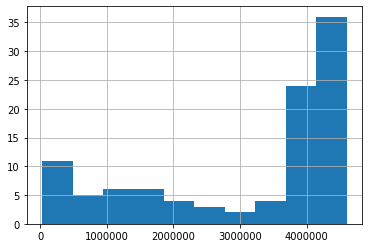

In [26]:
%matplotlib inline
pandas_df = df.toPandas()
pandas_df['total'].hist()

#### Spark SQL

In [30]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df = sqlCtx.read.json(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\census_2010.json")
df.registerTempTable('census2010')
tables = sqlCtx.tableNames()
print(tables)

['census2010']


In [31]:
sqlCtx.sql('select age from census2010').show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [32]:
query = 'select males, females from census2010 where age > 5 and age < 15'
sqlCtx.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



In [33]:
query = 'select males,females from census2010'
sqlCtx.sql(query).describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



In [36]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
df_2000 = sqlCtx.read.json(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\census_2000.json")
df_1990 = sqlCtx.read.json(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\census_1990.json")
df_1980 = sqlCtx.read.json(r"C:\Users\Xueho\Projects\Python_projects\Raw_data\census_1980.json")

df_2000.registerTempTable('census2000')
df_1990.registerTempTable('census1990')
df_1980.registerTempTable('census1980')
tables = sqlCtx.tableNames()
print(tables)

['census1980', 'census1990', 'census2000', 'census2010']


In [37]:
query = """
 select census2010.total, census2000.total
 from census2010
 inner join census2000
 on census2010.age=census2000.age
"""

sqlCtx.sql(query).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



In [38]:
query = """
 select sum(census2010.total), sum(census2000.total), sum(census1990.total)
 from census2010
 inner join census2000
 on census2010.age=census2000.age
 inner join census1990
 on census2010.age=census1990.age
"""
sqlCtx.sql(query).show()

+----------+----------+----------+
|sum(total)|sum(total)|sum(total)|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

